In [95]:
import numpy as np
np.random.seed(42)

In [96]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [97]:
dataset = load_boston()

/Users/chris/.conda/envs/UdemyML_Template/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

#### Einfache Lineare Regression

## Bedeutung

<font size="4">

- $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
- coef: Steigung der Geraden
- intercept: y-Achsenabschnitt

</font>

## Symbole

<font size="4">

- $\bar{x}$: Mittelwert von $x$
- $\bar{y}$: Mittelwert von $y$
- $\hat{y}$: Prediktion vom Modell

</font>

## Datensatz

<font size="4">

- $m$: Anzahl an Samples
- $n$: Anzahl an Features
- $x$: Input-Daten (Features)
- $y$: Output Daten (Targets)

## Formeln

<font size="4">

- $\beta = (X^TX)^{-1}X^Ty$
- coef = $\beta$\[1:\]
- intercept = $\beta$\[0\]
- $\hat{y} = X\beta$
- $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

</font>

In [98]:
class LinearRegression:
    def __init__(self, use_intercept: bool = True) -> None:
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None
        self.use_intercept = use_intercept

    def _add_intercept(self, x: np.ndarray) -> np.ndarray:
        intercepts = np.ones(shape=(x.shape[0])) # (N, 1) -> (N, 2)
        x = np.column_stack((intercepts, x))
        return x

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        if self.use_intercept:
            x = self._add_intercept(x)
        inner = np.dot(x.T, x)
        inv = np.linalg.inv(inner)
        beta = np.dot(np.dot(inv, x.T), y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred = np.array([np.dot(self.coef_.T, x[i]) + self.intercept_ for i in range(len(x))]) # für ein oder mehrdimensionale features
        y_pred = np.array([self.coef_ * x[i] + self.intercept_ for i in range(len(x))]) # nur für eindimensionale features
        y_pred =self.coef_ * x + self.intercept_ # vereinfachte schreibweise
        return y_pred

    def score(self, x: np.ndarray, y: np.ndarray):
        y_pred = self.predict(x)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum((y - y_pred) ** 2)
        denominator = np.sum((y - y_mean) ** 2)
        r2_score = 1.0 - (numerator / denominator)
        return r2_score

In [99]:
x = dataset.data[:, 5]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [100]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_own = regr.score(x_test, y_test)

y_pred = regr.predict(x_test)
r2_sklearn = r2_score(y_test, y_pred)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2_own: {r2_own}")
print(f"R2_sklearn: {r2_sklearn}")

Coef: [9.1181022]
Intercept: -34.66230743840718
R2_own: 0.45846499343030755
R2_sklearn: 0.45846499343030755


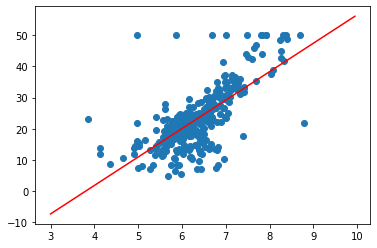

In [101]:
x_arange = np.arange(start=3.0, stop=10.0, step=0.05)
y_arange = regr.predict(x_arange)

plt.scatter(x_train, y_train)
plt.plot(x_arange, y_arange, color="red")
plt.show()